# Roya Afshar

Disease Prediction from Medical Data

Cardiac disease
Cardiovascular diseases are conditions that affect your heart and blood vessels. Without appropriate treatment, heart disease can lead to heart attacks or strokes. You can make lifestyle changes or take medications to manage cardiovascular disease. Earlier diagnosis can help with effective treatment.


Data description
The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

Columns:
Age
Height
Weight
Gender
Systolic blood pressure
Diastolic blood pressure
Cholesterol
Glucose
Smoking
Alcohol intake
Physical activity
Presence or absence of cardiovascular disease

# **DATA PRE-PROCESSING**

In [1]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading the data
df=pd.read_csv('https://raw.githubusercontent.com/freeCodeCamp/boilerplate-medical-data-visualizer/main/medical_examination.csv', sep=',')

In [3]:
## Checking the head of the data
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
## Checking the column names in the dataframe
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
## Finding the numerical and categorical columns
cat_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']
num_cols = [feature for feature in df.columns if feature not in cat_cols]

In [6]:
## Printing the numerical and categorical columns
print(f"Numerical columns: {num_cols}\n")
print(f"Categorical columns: {cat_cols}")

Numerical columns: ['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

Categorical columns: []


In [7]:
## Removing unnecessary columns
## Removing ID column since it doesn't provide any logical relation to the occurance of the disease
df.drop(columns=['id'],axis=1,inplace=True)

In [8]:
## Checking the successful dropping of ID and age_desc columns
df.columns

Index(['age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [9]:
num_cols.remove('id')

In [10]:
## Checking for missing values in the dataset
df.isnull().sum()

age            0
sex            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
## Checking whether the data is unbalanced or not
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [12]:
35021/(35021+34979)

0.5003

Both classes have same amount of data

The dataset seems balanced

In [13]:
## Creating a copy of the original dataset before encoding (for visualization)
df_copy = df.copy()

# **DATA VISUALIZATION**

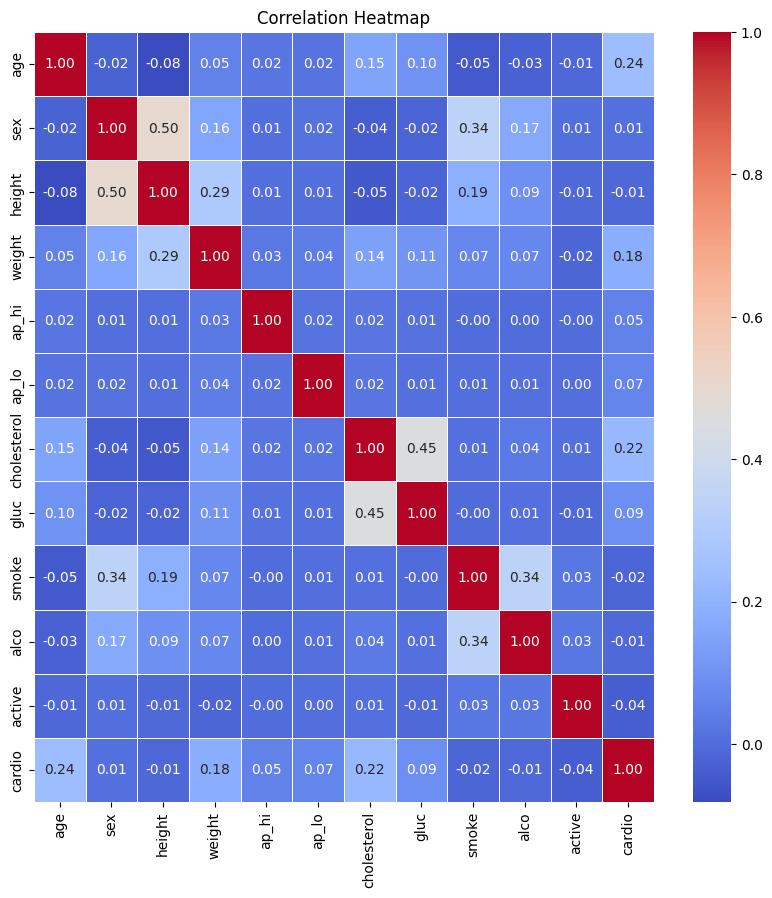

In [14]:
# Selecting numerical features for the heatmap
features_hm = ['age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
# Calculate the correlation matrix
correlation_matrix = df_copy[features_hm].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>],
       [<Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>,
        <Axes: title={'center': 'cardio'}>]], dtype=object)

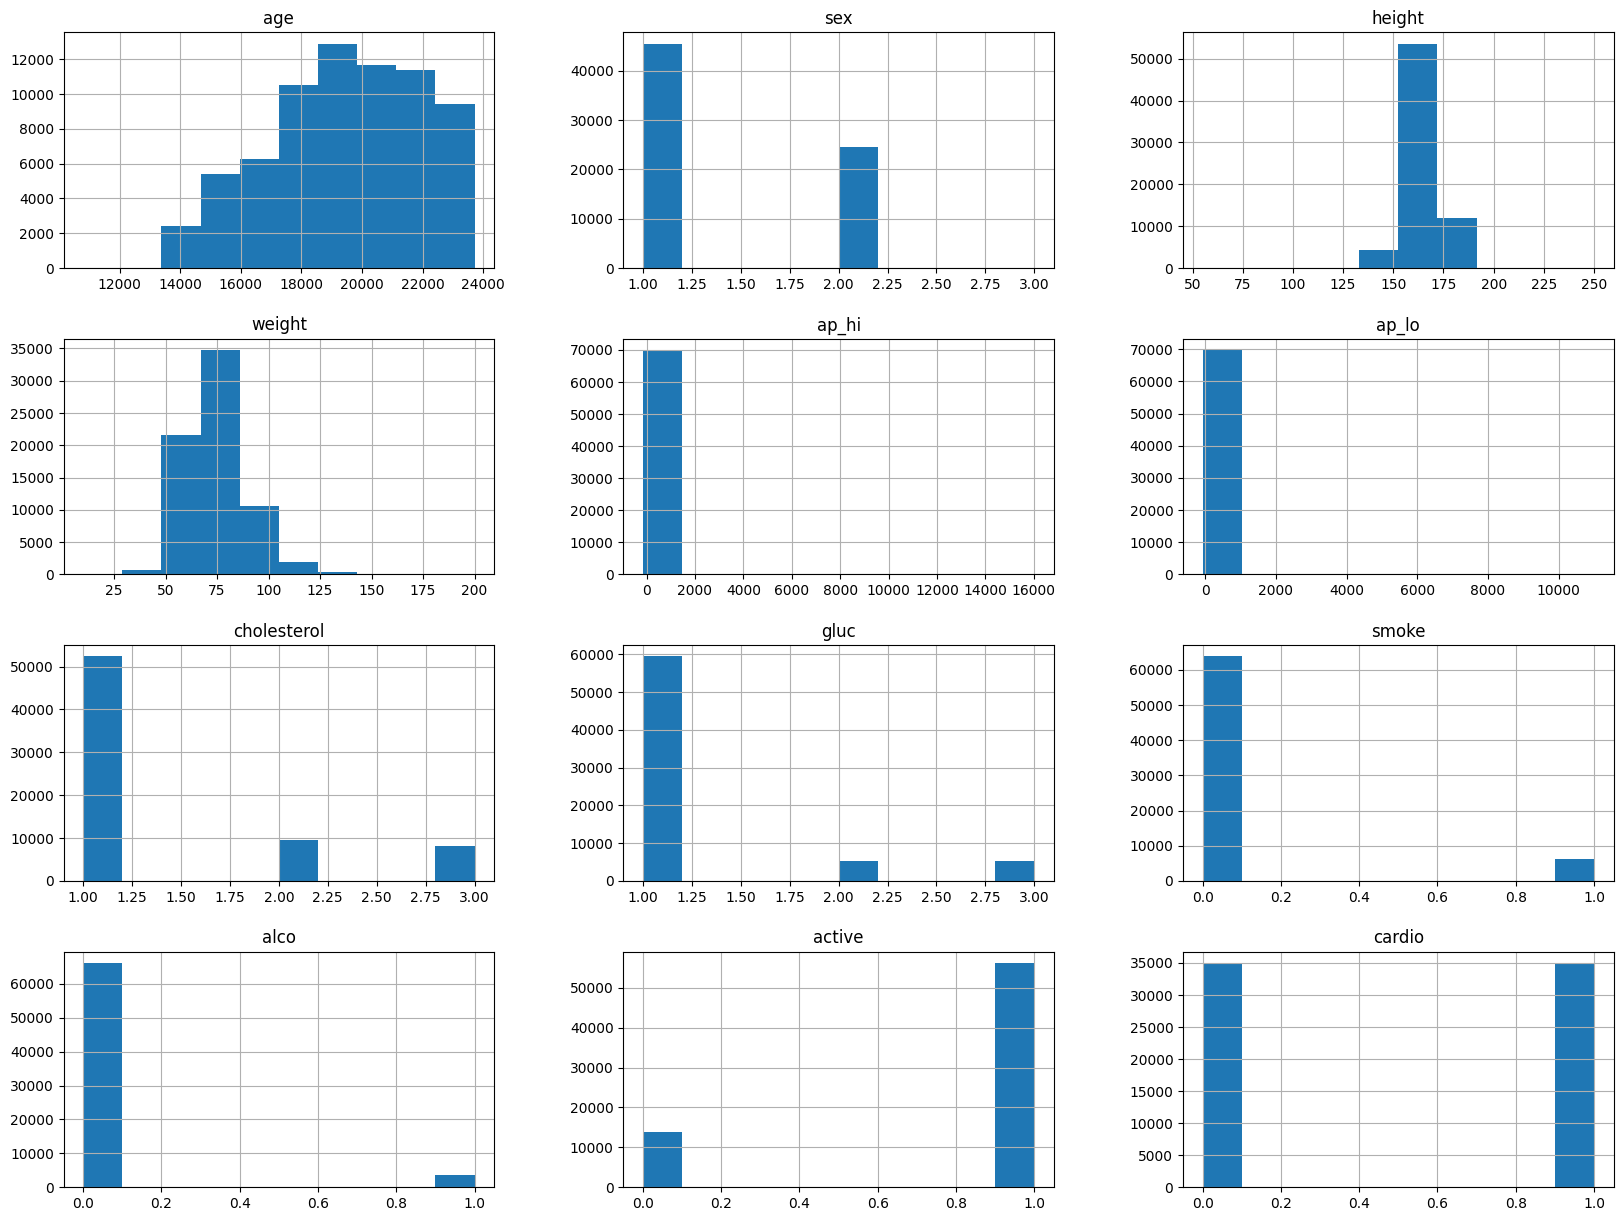

In [15]:
df.hist(figsize=(20,15))

([<matplotlib.axis.XTick at 0x7c12e1f81540>,
 [Text(0, 0, 'cardio Negative (0)'), Text(1, 0, 'cardio Positive (1)')])

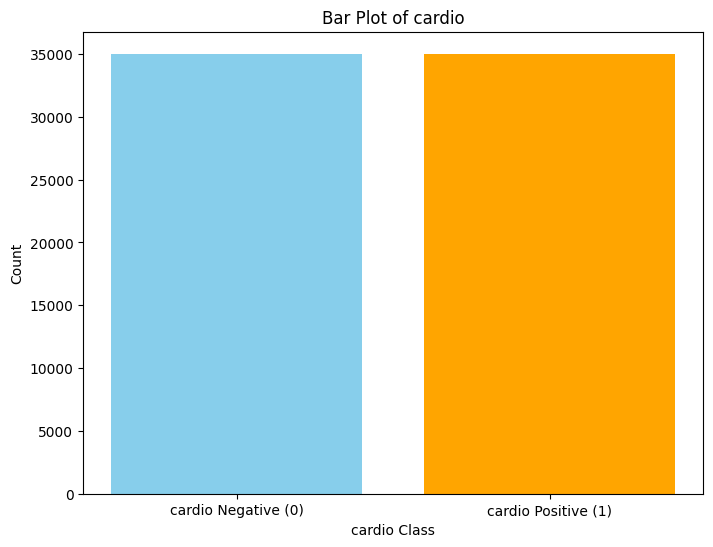

In [16]:
# Plotting bar plot for cardio to deduce the ratio of Autism-No Autism people in the training dataset
# Calculate the count of 0s and 1s
counts = df['cardio'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts.values, color=['skyblue', 'orange'])
plt.title('Bar Plot of cardio')
plt.xlabel('cardio Class')
plt.ylabel('Count')
plt.xticks(counts.index, labels=['cardio Negative (0)', 'cardio Positive (1)'])

<Axes: ylabel='Density'>

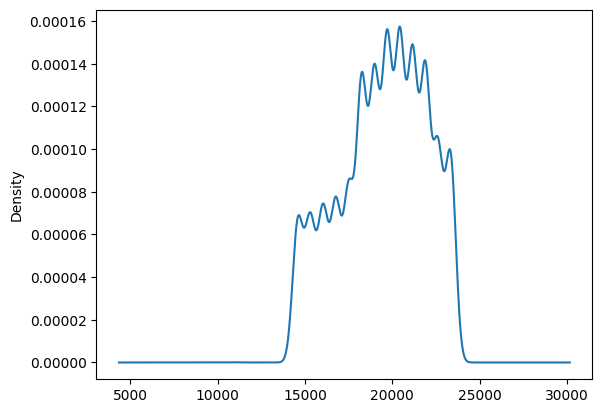

In [17]:
## Plotting the age group
df['age'].plot(kind='kde')

In [18]:
# Filter rows where Cardio is 1 (indicating people with cardio)
cardio_positive = df_copy[df_copy['cardio'] == 1]

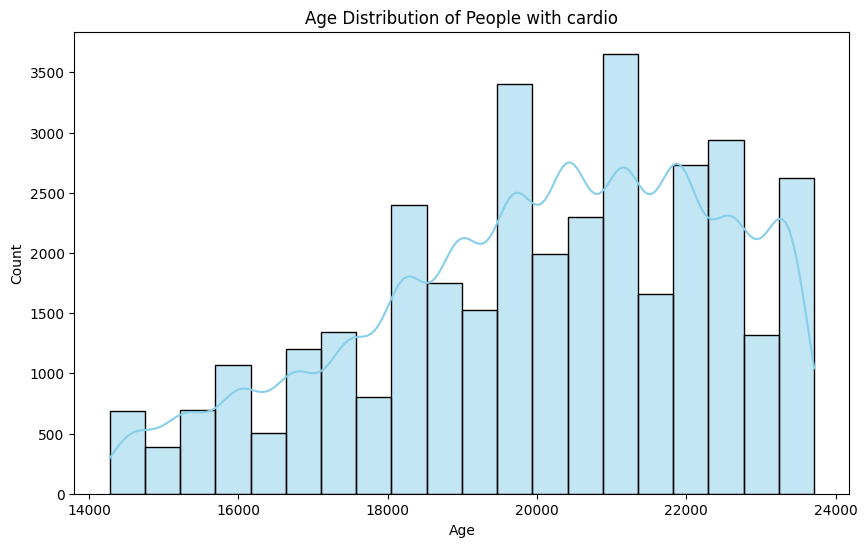

In [19]:
# Plotting age distribution for people with autism
plt.figure(figsize=(10, 6))
sns.histplot(cardio_positive['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of People with cardio')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-20-5441e07ec5f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cholesterol', data=cardio_positive, palette='viridis')


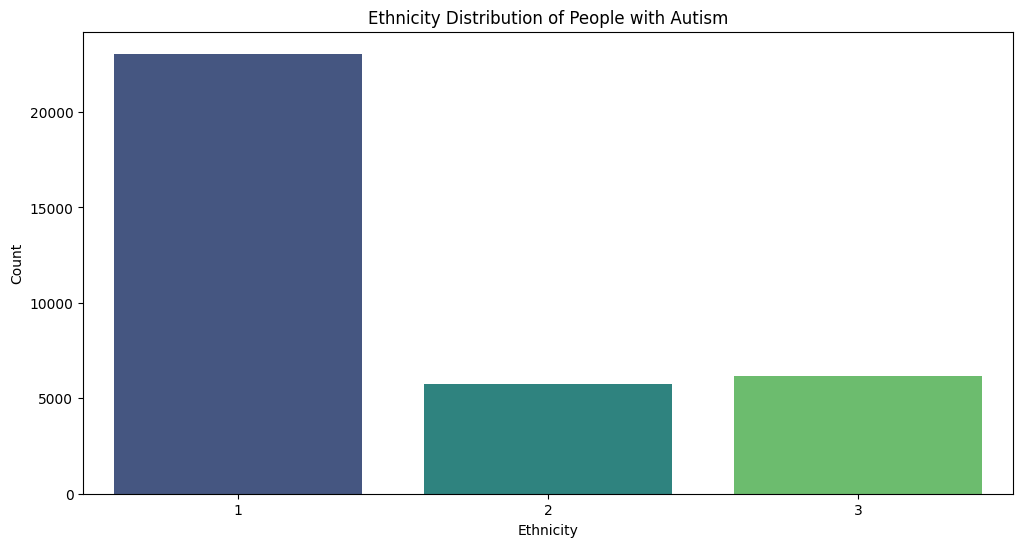

In [20]:
# Plotting cholestrel distribution for people with cardio
plt.figure(figsize=(12, 6))
sns.countplot(x='cholesterol', data=cardio_positive, palette='viridis')
plt.title('Ethnicity Distribution of People with Autism')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

<ipython-input-21-0050ccb0b615>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=cardio_positive, palette='viridis')


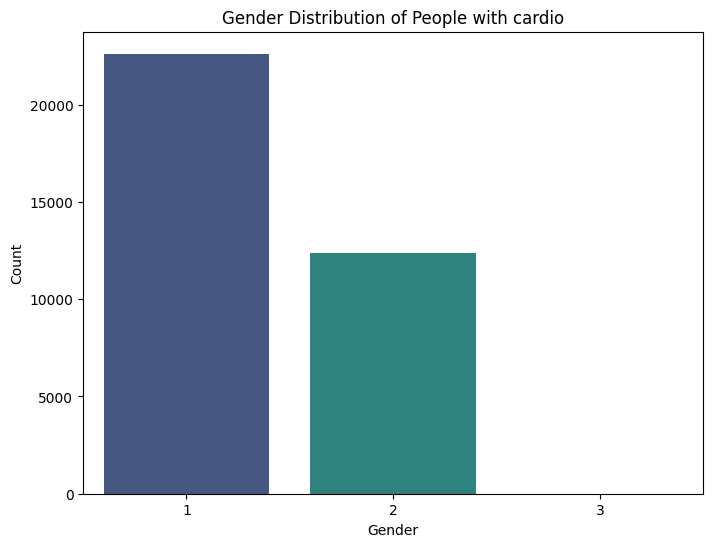

In [21]:
# Plotting gender distribution for people with cardio
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=cardio_positive, palette='viridis')
plt.title('Gender Distribution of People with cardio')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-22-55fc2d82b52c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoke', data=cardio_positive, palette='Pastel1')


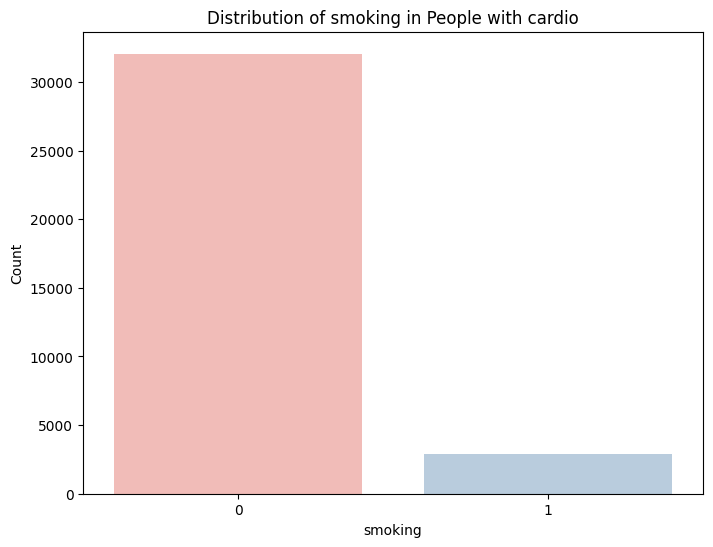

In [22]:
# Plotting smoking distribution for people with cardio
plt.figure(figsize=(8, 6))
sns.countplot(x='smoke', data=cardio_positive, palette='Pastel1')
plt.title('Distribution of smoking in People with cardio')
plt.xlabel('smoking')
plt.ylabel('Count')
plt.show()

# **Model Training**

In [23]:
## Splitting the train data into X_train and y_train
X_train = df.drop('cardio', axis=1)
y_train = df['cardio']

In [24]:
## Importing different model classes from the scikit-learn library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier

In [25]:
## Importing a method for finding the cross validation score on the training data
from sklearn.model_selection import cross_val_score

In [26]:
from sklearn.model_selection import train_test_split

# Assuming X is your data and y are your labels
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [27]:
## Creating a object for the models
lr = LogisticRegression(random_state=234, max_iter=3000)
svc = SVC(random_state=567,probability=True)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(max_depth=3, n_jobs=-1)
adab = AdaBoostClassifier(n_estimators=100, random_state=32389)
gradb = GradientBoostingClassifier(random_state=34990)

In [28]:
## Finding the cross validation score for every object that was created
model_lst = [lr]

for model in model_lst:
    cvs = cross_val_score(model, X_train, y_train, cv=10, scoring = 'accuracy', n_jobs=-1).mean()
    print(f"Cross validation score for the {model}: {np.round(cvs,3)}\n")

Cross validation score for the LogisticRegression(max_iter=3000, random_state=234): 0.705



In [29]:
from sklearn.metrics import roc_auc_score
import random

vc = VotingClassifier(estimators=
                     [('lr',lr)], voting='soft')
vc.fit(X_train, y_train)
vc_scores = vc.predict_proba(X_train)[:,1]
vc_roc_auc_score = np.round(roc_auc_score(y_train, vc_scores),3)
print(f"Cross validation score for the voting classifier: {vc_roc_auc_score}")

Cross validation score for the voting classifier: 0.768


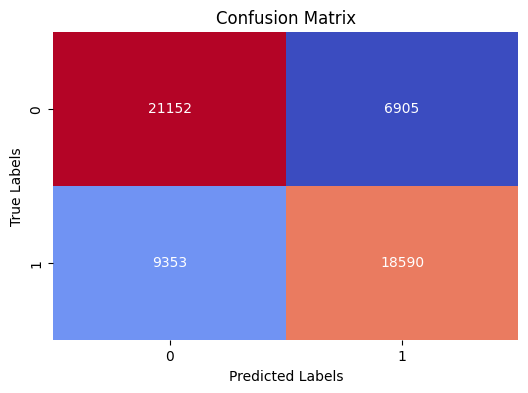

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtain the predicted labels for the train set
predicted = vc.predict(X_train)

# Create a confusion matrix
cm = confusion_matrix(y_train, predicted)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_train, predicted)

# Calculate precision
precision = precision_score(y_train, predicted)

# Calculate recall
recall = recall_score(y_train, predicted)

# Calculate F1 score
f1 = f1_score(y_train, predicted)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.710
Precision: 0.729
Recall: 0.665
F1 Score: 0.696


In [32]:
final_predictions = vc.predict(X_test)

In [33]:
final_predictions

array([0, 0, 1, ..., 1, 0, 0])

In [34]:
len(final_predictions)

14000

In [36]:
# Calculate accuracy
accuracy = accuracy_score(y_test, final_predictions)

# Calculate precision
precision = precision_score(y_test, final_predictions)

# Calculate recall
recall = recall_score(y_test, final_predictions)

# Calculate F1 score
f1 = f1_score(y_test, final_predictions)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.702
Precision: 0.722
Recall: 0.663
F1 Score: 0.691
